In [12]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='once')

from scipy.spatial import ConvexHull


In [13]:
large: int = 22
med: int = 16
small: int = 12
params: dict = {
    'axes.titlesize': large,
    'legend.fontsize': med,
    'figure.figsize':(16,10),
    'axes.labelsize': med,
    'axes.titlesize': med,
    'xtick.labelsize': med,
    'ytick.labelsize': med,
    'figure.titlesize': large
}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')

%matplotlib inline

C:\Users\sp0nd\AppData\Local\Temp\ipykernel_21228\1174054444.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [14]:
midwest = pd.read_csv(r'https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv')
print(midwest.head(10))

   PID     county state   area  poptotal   popdensity  popwhite  popblack  \
0  561      ADAMS    IL  0.052     66090  1270.961540     63917      1702   
1  562  ALEXANDER    IL  0.014     10626   759.000000      7054      3496   
2  563       BOND    IL  0.022     14991   681.409091     14477       429   
3  564      BOONE    IL  0.017     30806  1812.117650     29344       127   
4  565      BROWN    IL  0.018      5836   324.222222      5264       547   
5  566     BUREAU    IL  0.050     35688   713.760000     35157        50   
6  567    CALHOUN    IL  0.017      5322   313.058824      5298         1   
7  568    CARROLL    IL  0.027     16805   622.407407     16519       111   
8  569       CASS    IL  0.024     13437   559.875000     13384        16   
9  571  CHRISTIAN    IL  0.042     34418   819.476190     34176        82   

   popamerindian  popasian  ...  percprof  poppovertyknown  percpovertyknown  \
0             98       249  ...  4.355859            63628         96.27

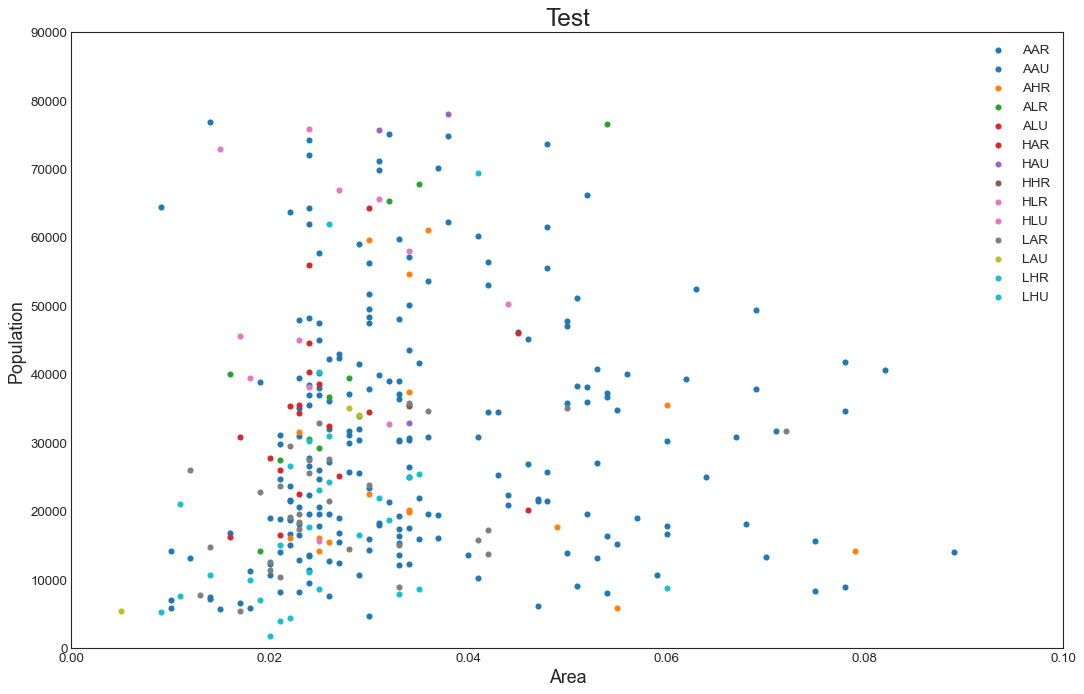

In [15]:
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

plt.figure(figsize=(16,10), dpi=80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal',
                data=midwest.loc[midwest.category == category,:],
                s=20, c=[colors[i]], label=str(category))
    
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Test', fontsize=22)
plt.legend(fontsize=12)
plt.show()

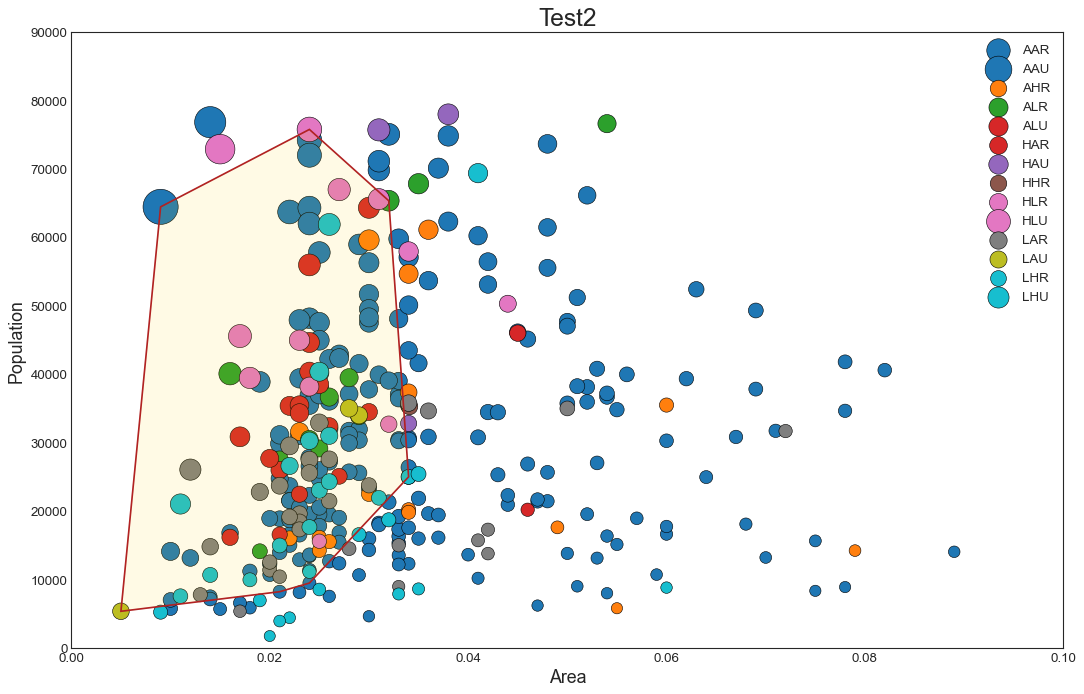

In [16]:
fig = plt.figure(figsize=(16,10), dpi=80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area','poptotal',
                data=midwest.loc[midwest.category == category, :],
                s='dot_size', c=[colors[i]], label=str(category), edgecolors='black', linewidths=.5)
    
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p=np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)
    
midwest_encircle_data = midwest.loc[midwest.state == 'IN', :]

encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec='k', fc='gold', alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec='firebrick', fc='none', linewidth=1.5)

plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Test2', fontsize=22)
plt.legend(fontsize=12)
plt.show()

#### colums 설명
- displ 배기량
- yeal 제조년도
- cyl 실린더 수
- trans 변속기
- drv 구동방식 (f = 전륜구동, r = 후륜구동, 4 = 사륜구동)
- city 도시연비
- hwy 고속도로 연비
- fl 연료 종류
- class 자동차 종류

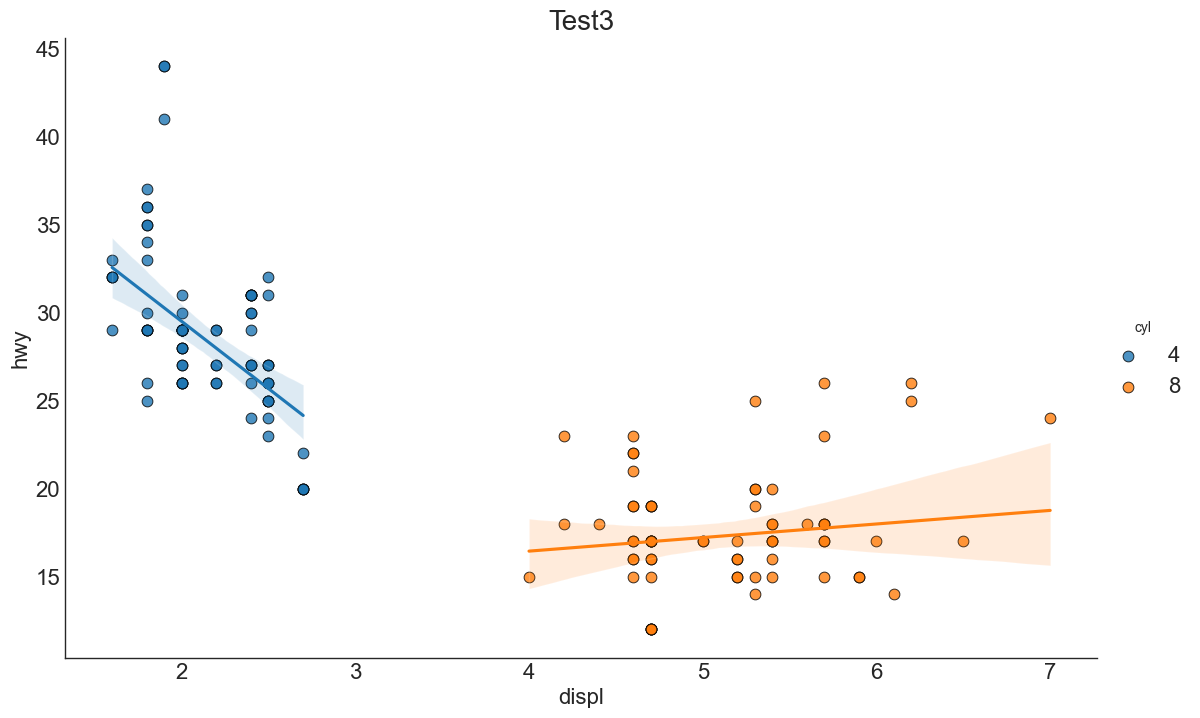

In [21]:
df = pd.read_csv(r'https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv')
df_select = df.loc[df.cyl.isin([4,8]), :]

sns.set_style('white')
gridobj = sns.lmplot(x='displ', y='hwy', hue='cyl', data=df_select,
                     height=7, aspect=1.6, robust=True, palette='tab10',
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title('Test3', fontsize=20)
plt.show()

C:\Users\sp0nd\AppData\Local\Temp\ipykernel_21228\3428822784.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_main.set_xticklabels(xlabels)


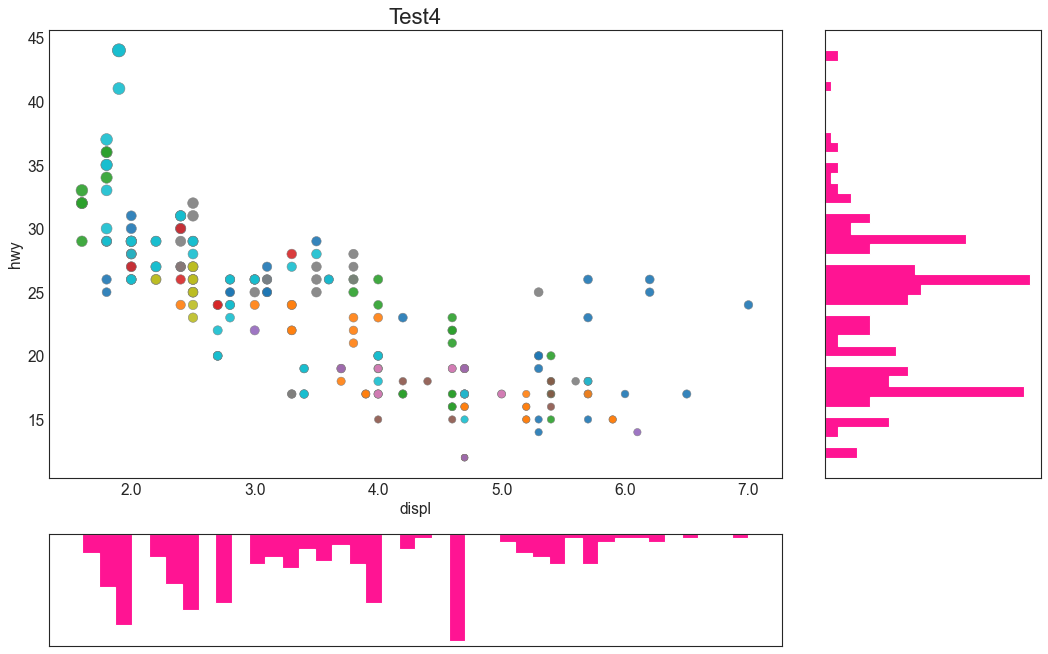

In [23]:
df = pd.read_csv(r'https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv')

fig = plt.figure(figsize=(16,10), dpi=80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[],yticklabels=[])

ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap='tab10', edgecolors='gray', linewidths=.5)

ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

ax_main.set(title='Test4', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)

for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)
    
xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)

plt.show()

C:\Users\sp0nd\AppData\Local\Temp\ipykernel_21228\3575180435.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', annot=True)


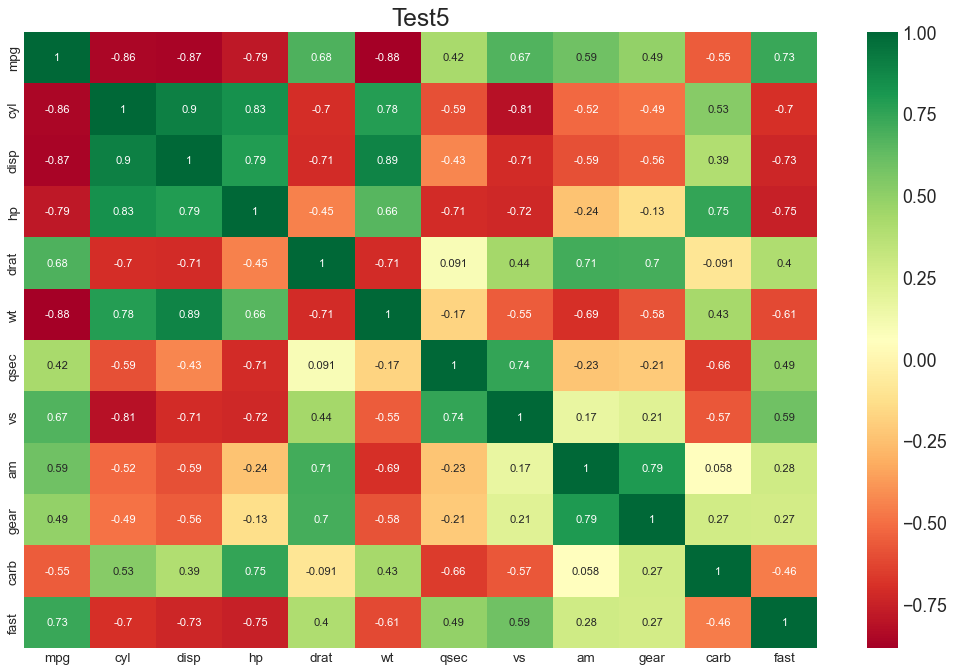

In [26]:
df = pd.read_csv(r'https://github.com/selva86/datasets/raw/master/mtcars.csv')

plt.figure(figsize=(16, 10), dpi = 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', annot=True)

plt.title('Test5', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

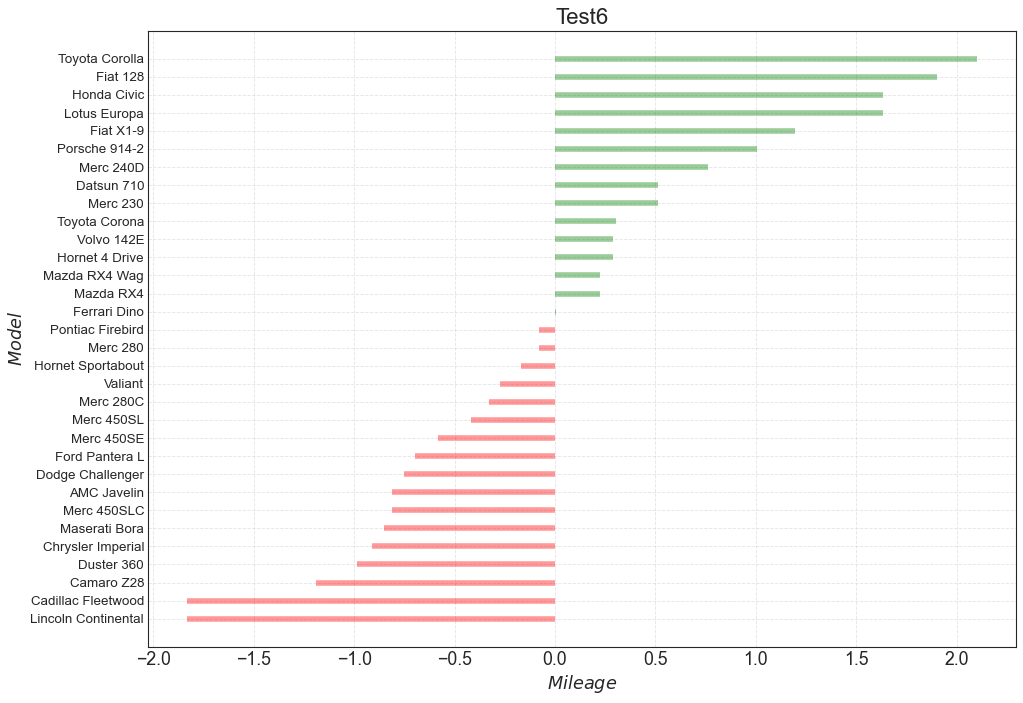

In [27]:
df = pd.read_csv(r'https://github.com/selva86/datasets/raw/master/mtcars.csv')
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

plt.figure(figsize=(14, 10), dpi=80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Test6', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

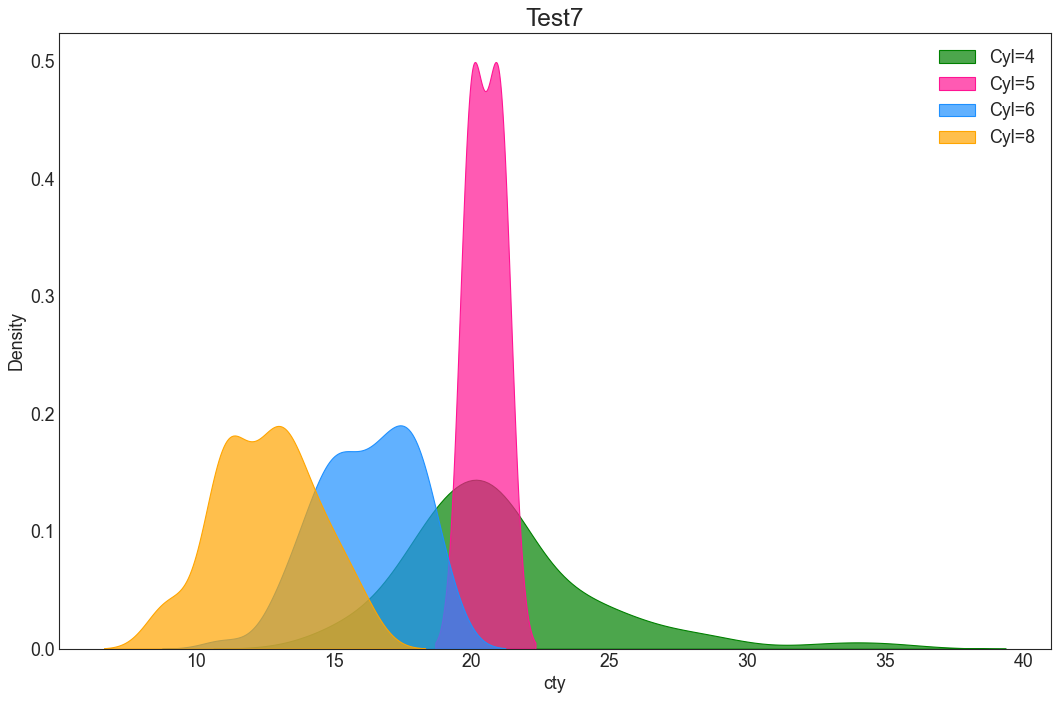

In [49]:
df = pd.read_csv(r'https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv')

plt.figure(figsize=(16, 10), dpi=80)
sns.kdeplot(df.loc[df['cyl'] == 4, 'cty'], fill=True, color='g', label='Cyl=4', alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 5, 'cty'], fill=True, color='deeppink', label='Cyl=5', alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, 'cty'], fill=True, color='dodgerblue', label='Cyl=6', alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, 'cty'], fill=True, color='orange', label='Cyl=8', alpha=.7)

plt.title('Test7', fontsize=22)
plt.legend()
plt.show()

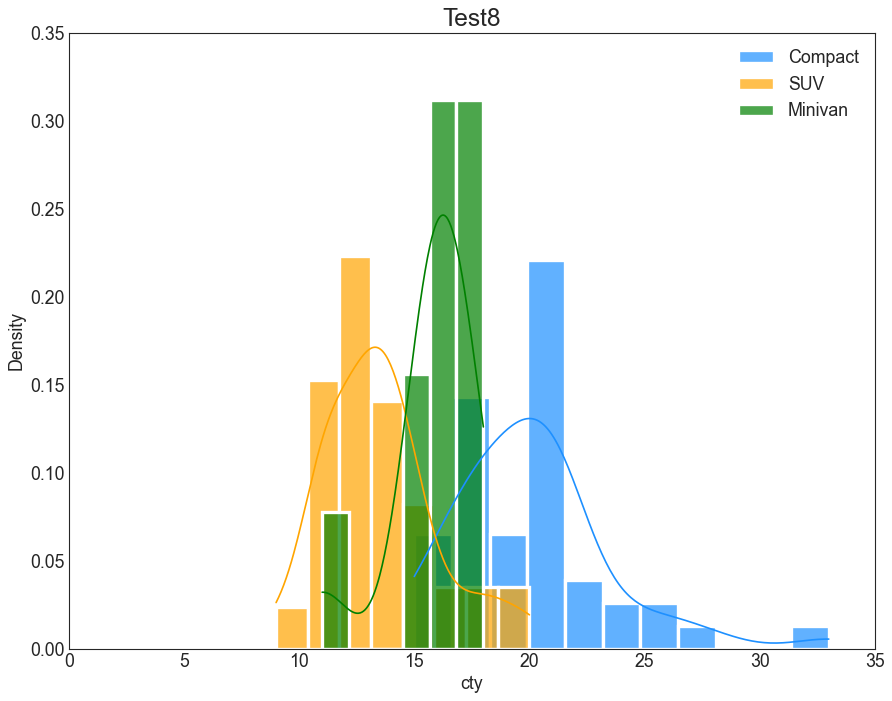

In [69]:
df = pd.read_csv(r'https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv')
plt.figure(figsize=(13, 10), dpi=80)

sns.histplot(df.loc[df['class'] == 'compact', 'cty'], color='dodgerblue', label='Compact', alpha=.7, kde=True, linewidth=3, stat='density')
sns.histplot(df.loc[df['class'] == 'suv', 'cty'], color='orange', label='SUV', alpha=.7, kde=True, linewidth=3, stat='density')
sns.histplot(df.loc[df['class'] == 'minivan', 'cty'], color='g', label='Minivan', alpha=.7, kde=True, linewidth=3, stat='density')
plt.xlim(0, 35)
plt.ylim(0, 0.35)


plt.title('Test8', fontsize=22)
plt.legend()
plt.show()

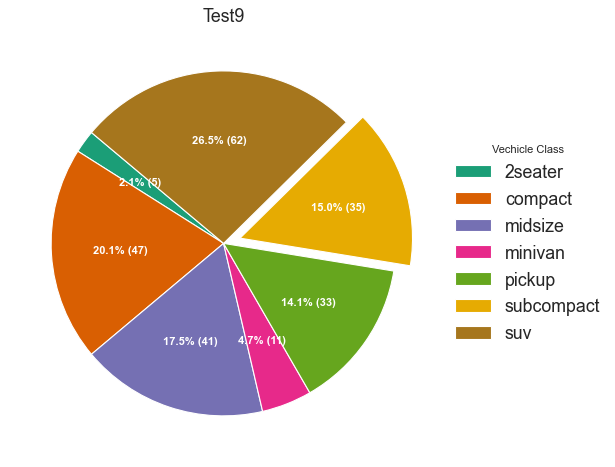

In [71]:
df_raw = pd.read_csv(r'https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv')

df = df_raw.groupby('class').size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect='equal'),dpi=80)

data = df['counts']
categories = df['class']
explode = [0,0,0,0,0,0.1,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color='w'),
                                  colors=plt.cm.Dark2.colors,
                                  startangle=140,
                                  explode=explode)

ax.legend(wedges, categories, title='Vechicle Class', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title('Test9')
plt.show()

C:\Users\sp0nd\AppData\Local\Temp\ipykernel_21228\619730519.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment='right')


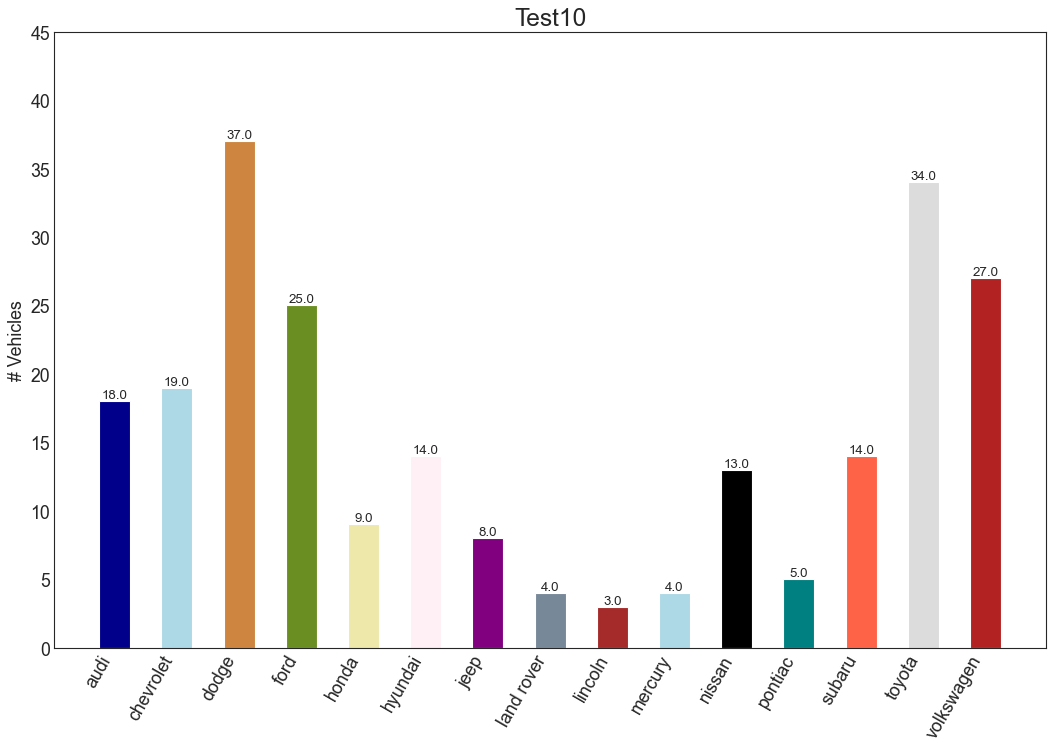

In [72]:
import random

df_raw = pd.read_csv(r'https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv')

df = df_raw.groupby('manufacturer').size().reset_index(name='counts')
n = df['manufacturer'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16, 10),dpi=80)
plt.bar(df['manufacturer'], df['counts'], color=c, width=.5)
for i,val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
    
plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment='right')
plt.title('Test10', fontsize=22)
plt.ylabel('# Vehicles')
plt.ylim(0, 45)
plt.show()
